# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Write Function

In [2]:
def LR_find_r(X, Y):
    Xmean = X.mean()
    Ymean = Y.mean()
    fraction = ((X - Xmean)*(Y - Ymean)).sum()
    denorminator = np.sqrt(((X - Xmean)**2).sum()*((Y - Ymean)**2).sum())
    r = fraction/denorminator
    return r

In [3]:
def LR_find_ab_local(X, Y, epoch = 1000, lr = 0.01):
    a = np.random.randn(1)[0]
    b = np.random.randn(1)[0]
    error_list = []
    for i in range(epoch):
        Yhat = LR_find_Yhat(X, a, b)
        error = find_error(Y, Yhat, 'SSE')
        error_list.append(error)
        a = a + (lr/N)*np.dot(X.T, Y - Yhat)
        b = b + (lr/N)*(Y - Yhat).sum()
    return a, b, error_list

In [4]:
def LR_find_Yhat(X, a, b):
    Yhat = a*X + b
    return Yhat

In [5]:
def find_error(Y, Yhat, TypeOfError):
    if TypeOfError == 'SSE':
        error = find_SSE(Y, Yhat)
    elif TypeOfError == 'MSE':
        error = find_MSE(Y, Yhat)
    elif TypeOfError == 'MAE':
        error = find_MAE(Y, Yhat)
    elif TypeOfError == 'MAPE':
        error = find_MAPE(Y, Yhat)
    return error

In [6]:
def find_SSE(Y, Yhat):
    SSE = ((Y - Yhat)**2).sum()
    return SSE

In [7]:
def find_MSE(Y, Yhat):
    N = Y.shape[0]
    SSE = ((Y - Yhat)**2).sum()
    MSE = SSE/N
    return MSE

In [8]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [9]:
def find_MAPE(Y, Yhat):
    N = Y.shape[0]
    MAPE = np.abs((Y - Yhat)/Y).sum()*100/N
    return MAPE

# 3. Read Data & Prepare Data

In [10]:
Data = pd.read_excel('THAI - PTT.xlsx')

In [11]:
Data

,Unnamed: 0,วันเดือนปี,THAI,PTT
0,85,"Jan 02, 2019",12.2,46.25
1,84,"Jan 03, 2019",12.0,45.50
2,83,"Jan 04, 2019",12.1,46.75
3,82,"Jan 07, 2019",12.4,48.00
4,81,"Jan 08, 2019",12.7,48.00
5,80,"Jan 09, 2019",12.5,48.25
6,79,"Jan 10, 2019",12.7,48.75
7,78,"Jan 11, 2019",12.4,49.25
8,77,"Jan 14, 2019",12.4,48.00
9,76,"Jan 15, 2019",12.4,47.75


In [12]:
DataMatrix = Data.values

In [13]:
DataMatrix

array([[85, 'Jan 02, 2019', 12.2, 46.25],
       [84, 'Jan 03, 2019', 12.0, 45.5],
       [83, 'Jan 04, 2019', 12.1, 46.75],
       [82, 'Jan 07, 2019', 12.4, 48.0],
       [81, 'Jan 08, 2019', 12.7, 48.0],
       [80, 'Jan 09, 2019', 12.5, 48.25],
       [79, 'Jan 10, 2019', 12.7, 48.75],
       [78, 'Jan 11, 2019', 12.4, 49.25],
       [77, 'Jan 14, 2019', 12.4, 48.0],
       [76, 'Jan 15, 2019', 12.4, 47.75],
       [75, 'Jan 16, 2019', 12.2, 47.5],
       [74, 'Jan 17, 2019', 12.3, 47.25],
       [73, 'Jan 18, 2019', 12.5, 48.25],
       [72, 'Jan 21, 2019', 12.4, 48.75],
       [71, 'Jan 22, 2019', 12.5, 49.5],
       [70, 'Jan 23, 2019', 12.8, 49.5],
       [69, 'Jan 24, 2019', 12.8, 49.0],
       [68, 'Jan 25, 2019', 12.9, 48.75],
       [67, 'Jan 28, 2019', 13.4, 48.75],
       [66, 'Jan 29, 2019', 13.3, 48.25],
       [65, 'Jan 30, 2019', 13.2, 48.25],
       [64, 'Jan 31, 2019', 13.3, 48.5],
       [63, 'Feb 01, 2019', 13.2, 49.5],
       [62, 'Feb 04, 2019', 13.4, 49.25],
  

In [14]:
N = DataMatrix.shape[0]

In [15]:
N

85

In [16]:
X = DataMatrix[:, 2:3]
X

array([[12.2],
       [12.0],
       [12.1],
       [12.4],
       [12.7],
       [12.5],
       [12.7],
       [12.4],
       [12.4],
       [12.4],
       [12.2],
       [12.3],
       [12.5],
       [12.4],
       [12.5],
       [12.8],
       [12.8],
       [12.9],
       [13.4],
       [13.3],
       [13.2],
       [13.3],
       [13.2],
       [13.4],
       [13.6],
       [13.7],
       [13.4],
       [13.2],
       [13.2],
       [13.3],
       [13.3],
       [13.4],
       [13.2],
       [13.2],
       [13.1],
       [13.3],
       [13.5],
       [13.5],
       [13.4],
       [13.3],
       [13.1],
       [12.6],
       [12.6],
       [12.9],
       [13.0],
       [13.1],
       [12.8],
       [12.6],
       [12.5],
       [12.6],
       [12.5],
       [12.3],
       [12.2],
       [12.2],
       [12.2],
       [12.5],
       [12.5],
       [12.3],
       [12.3],
       [12.4],
       [12.4],
       [12.3],
       [12.5],
       [12.5],
       [12.4],
       [12.4],
       [12

In [17]:
Y = DataMatrix[:, 3:]

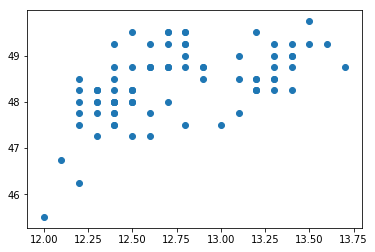

In [18]:
plt.scatter(X, Y)

In [19]:
r = LR_find_r(X, Y)

In [20]:
r

0.5281551414329544

In [21]:
X_Train = X[:60]
Y_Train = Y[:60]

In [22]:
X_Test = X[60:]
Y_Test = Y[60:]

# 4. Create Model

In [23]:
a, b, error_list = LR_find_ab_local(X_Train, Y_Train)

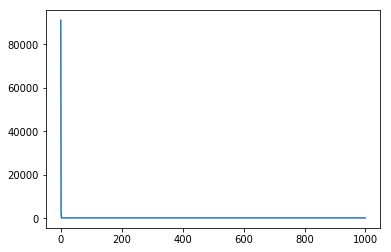

In [24]:
plt.plot(error_list, label = 'error')

In [25]:
Yhat_Train = LR_find_Yhat(X_Train, a, b)

In [26]:
error_Train = find_error(Y_Train, Yhat_Train, 'MAPE')

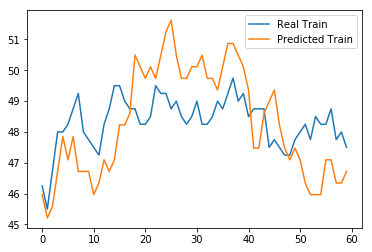

In [27]:
plt.plot(Y_Train, label = 'Real Train')
plt.plot(Yhat_Train, label = 'Predicted Train')
plt.legend()

In [28]:
error_Train

2.6195918403528675

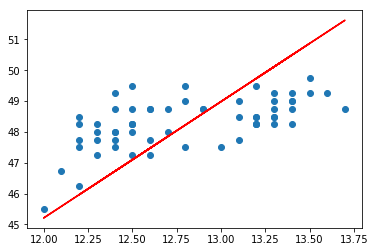

In [29]:
plt.scatter(X_Train, Y_Train)
plt.plot(X_Train, Yhat_Train, 'r')

# 5. Make Prediction

In [30]:
Yhat_Test = LR_find_Yhat(X_Test, a, b)

In [31]:
error_Test = find_error(Y_Test, Yhat_Test, 'MAPE')

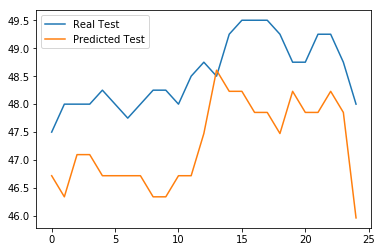

In [32]:
plt.plot(Y_Test, label = 'Real Test')
plt.plot(Yhat_Test, label = 'Predicted Test')
plt.legend()

In [33]:
error_Test

2.6150945709405415

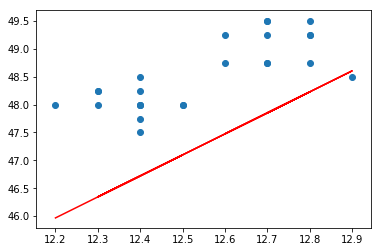

In [34]:
plt.scatter(X_Test, Y_Test)
plt.plot(X_Test, Yhat_Test, 'r')